# Modelos de Machine Learning - Wine Quality

## 1️⃣ Importación de Librerías

In [19]:
import sys
import os
import warnings

# Obtener la ruta absoluta del directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Agregar la carpeta scripts al path
sys.path.append(os.path.join(project_root, "scripts"))
from load_processed_data import load_processed_data # type: ignore
from evaluate_model import evaluate_model # type: ignore
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

## 2️⃣ Carga de Datos

In [3]:
# Cargar los datos preprocesados
X_train, X_test, y_train, y_test = load_processed_data()

# Verificar la forma de los datos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Distribución de clases en y_train:\n{y_train.value_counts(normalize=True)}")

✅ Datos preprocesados cargados correctamente.
Dimensiones de X_train: (4547, 15)
Dimensiones de X_test: (1950, 15)
Distribución de clases en y_train:
quality
6    0.436552
5    0.329008
7    0.166044
4    0.033209
8    0.029690
3    0.004618
9    0.000880
Name: proportion, dtype: float64


## 3️⃣ Entrenar modelos

In [4]:
from sklearn.impute import SimpleImputer

# Imputar los valores faltantes en X_train y X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

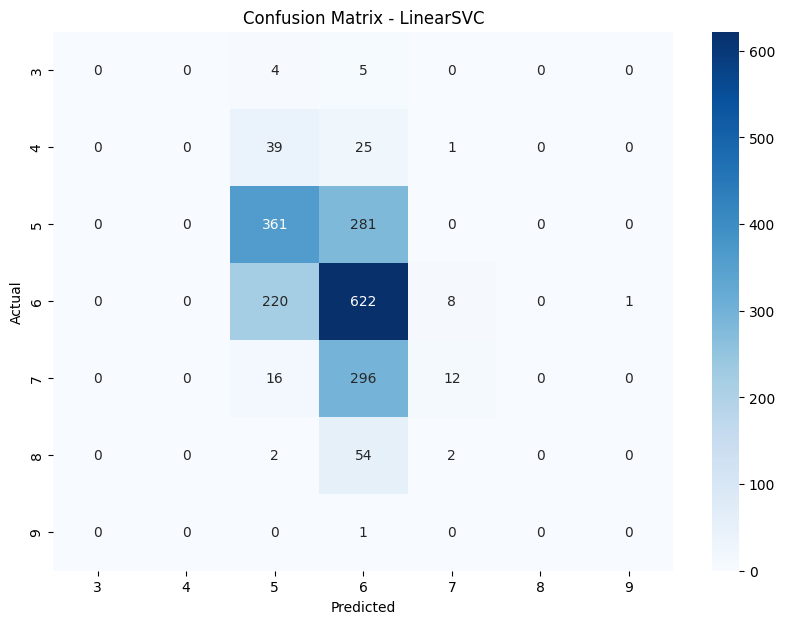


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        65
           5       0.56      0.56      0.56       642
           6       0.48      0.73      0.58       851
           7       0.52      0.04      0.07       324
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00         1

    accuracy                           0.51      1950
   macro avg       0.22      0.19      0.17      1950
weighted avg       0.48      0.51      0.45      1950

✅ Resultados de LinearSVC: {'Accuracy': 0.5102564102564102, 'Precision': 0.48322462899870455, 'Recall': 0.5102564102564102, 'F1-Score': 0.450903185915044}


In [5]:
# Definir el modelo optimizado para clasificación multiclase
model_svm = LinearSVC(C=1.0, random_state=42, max_iter=5000)

# Entrenar el modelo
model_svm.fit(X_train_imputed, y_train)

# Convertir las etiquetas a cadenas de texto
labels = sorted([str(label) for label in y_train.unique().tolist()])

# Evaluar el modelo
results_svm = evaluate_model(model_svm, X_test_imputed, y_test, labels=labels)
print("✅ Resultados de LinearSVC:", results_svm)

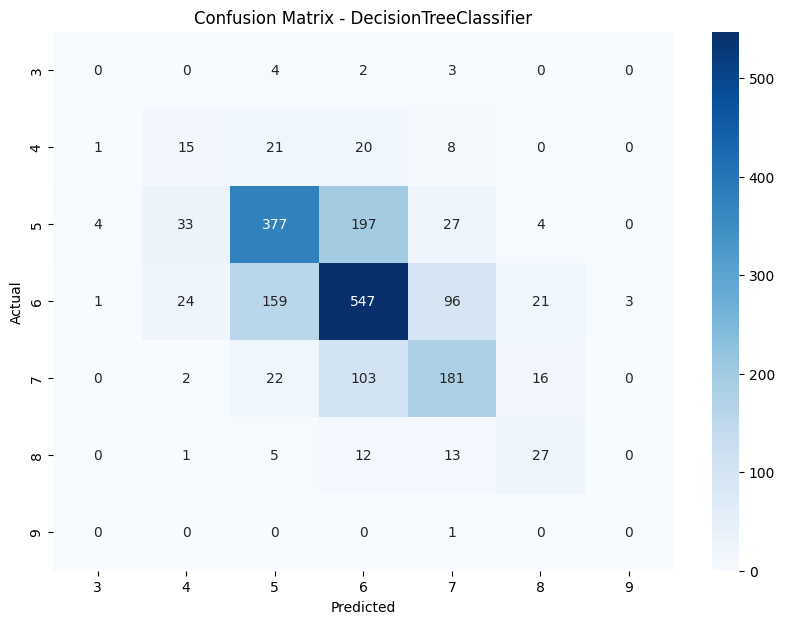


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.20      0.23      0.21        65
           5       0.64      0.59      0.61       642
           6       0.62      0.64      0.63       851
           7       0.55      0.56      0.55       324
           8       0.40      0.47      0.43        58
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1950
   macro avg       0.34      0.35      0.35      1950
weighted avg       0.59      0.59      0.59      1950

✅ Resultados Decision Tree: {'Accuracy': 0.5882051282051282, 'Precision': 0.5919356616099646, 'Recall': 0.5882051282051282, 'F1-Score': 0.5894750906542463}


In [6]:
# Modelo Árbol de Decisión
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
results_dt = evaluate_model(model_dt, X_test_imputed, y_test, labels=labels)
print("✅ Resultados Decision Tree:", results_dt)

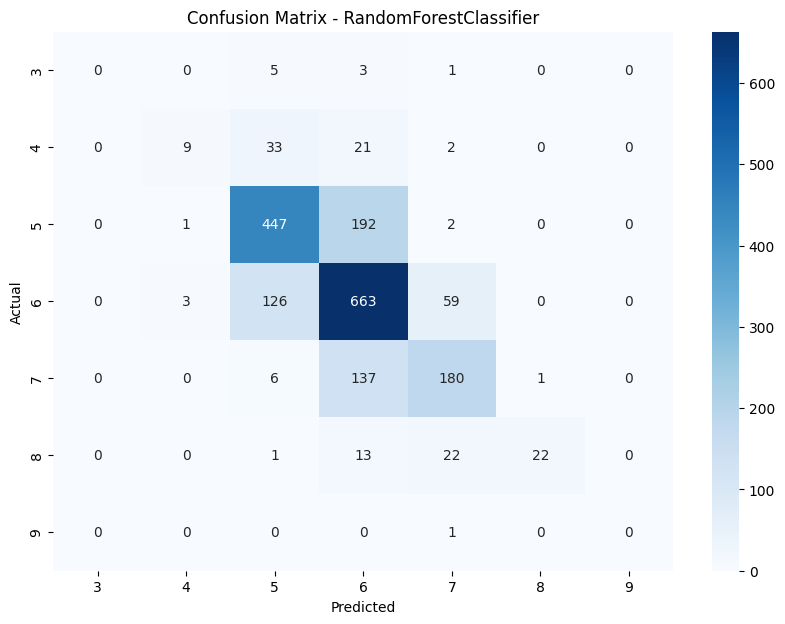


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.69      0.14      0.23        65
           5       0.72      0.70      0.71       642
           6       0.64      0.78      0.71       851
           7       0.67      0.56      0.61       324
           8       0.96      0.38      0.54        58
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1950
   macro avg       0.53      0.36      0.40      1950
weighted avg       0.68      0.68      0.67      1950

✅ Resultados Random Forest: {'Accuracy': 0.6774358974358974, 'Precision': 0.6828596942643286, 'Recall': 0.6774358974358974, 'F1-Score': 0.6664653643024838}


In [7]:
# Modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
results_rf = evaluate_model(model_rf, X_test, y_test, labels=labels)
print("✅ Resultados Random Forest:", results_rf)

## 4️⃣ Comparación de Modelos - Métricas Clave

In [8]:
# Crear DataFrame con los resultados obtenidos
model_results = pd.DataFrame({
    "Modelo": ["LinearSVC", "Decision Tree", "Random Forest"],
    "Accuracy": [results_svm["Accuracy"], results_dt["Accuracy"], results_rf["Accuracy"]],
    "F1-Score": [results_svm["F1-Score"], results_dt["F1-Score"], results_rf["F1-Score"]],
    "Precision": [results_svm["Precision"], results_dt["Precision"], results_rf["Precision"]],
    "Recall": [results_svm["Recall"], results_dt["Recall"], results_rf["Recall"]]
})

# Ordenar por mejor Accuracy
model_results = model_results.sort_values(by="Accuracy", ascending=False)
print("📊 Resultados finales:")
print(model_results)

📊 Resultados finales:
          Modelo  Accuracy  F1-Score  Precision    Recall
2  Random Forest  0.677436  0.666465   0.682860  0.677436
1  Decision Tree  0.588205  0.589475   0.591936  0.588205
0      LinearSVC  0.510256  0.450903   0.483225  0.510256


## 5️⃣ Modelos Avanzados: XGBoost, LightGBM y Redes Neuronales

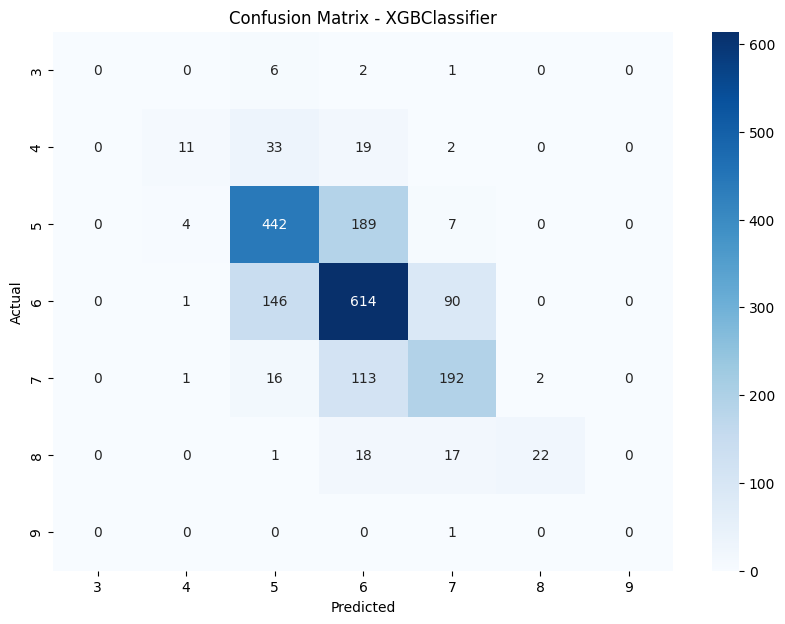


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.65      0.17      0.27        65
           5       0.69      0.69      0.69       642
           6       0.64      0.72      0.68       851
           7       0.62      0.59      0.61       324
           8       0.92      0.38      0.54        58
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1950
   macro avg       0.50      0.36      0.40      1950
weighted avg       0.66      0.66      0.65      1950

✅ Resultados XGBoost: {'Accuracy': 0.6569230769230769, 'Precision': 0.6582865977767139, 'Recall': 0.6569230769230769, 'F1-Score': 0.6485926276294609}


In [16]:
# Ajustar las etiquetas para que comiencen desde 0
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_test.min()

# XGBoost
model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
model_xgb.fit(X_train, y_train_adjusted)
results_xgb = evaluate_model(model_xgb, X_test, y_test_adjusted, labels=labels)
print("✅ Resultados XGBoost:", results_xgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2404
[LightGBM] [Info] Number of data points in the train set: 4547, number of used features: 15
[LightGBM] [Info] Start training from score -5.377701
[LightGBM] [Info] Start training from score -3.404943
[LightGBM] [Info] Start training from score -1.111673
[LightGBM] [Info] Start training from score -0.828849
[LightGBM] [Info] Start training from score -1.795505
[LightGBM] [Info] Start training from score -3.516948
[LightGBM] [Info] Start training from score -7.035929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

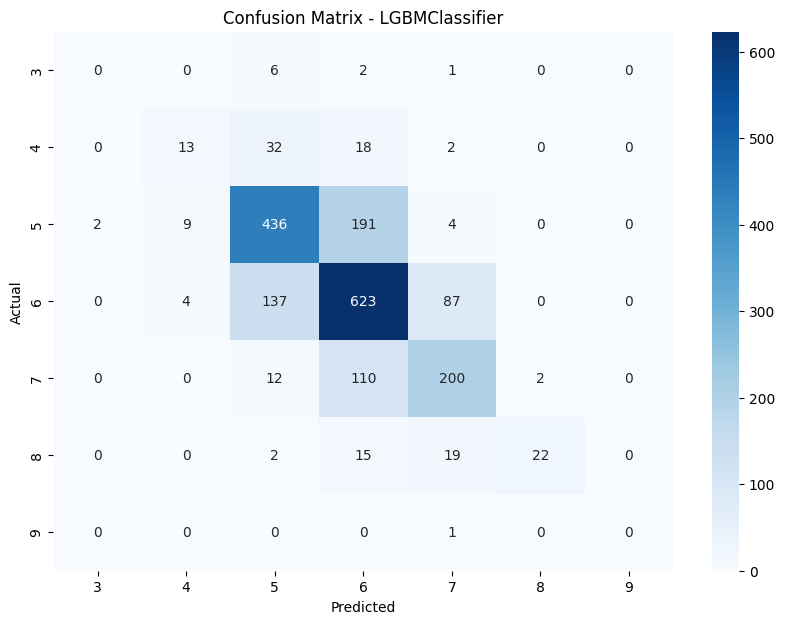


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.50      0.20      0.29        65
           5       0.70      0.68      0.69       642
           6       0.65      0.73      0.69       851
           7       0.64      0.62      0.63       324
           8       0.92      0.38      0.54        58
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1950
   macro avg       0.49      0.37      0.40      1950
weighted avg       0.66      0.66      0.66      1950

✅ Resultados LightGBM: {'Accuracy': 0.6635897435897435, 'Precision': 0.662940876654694, 'Recall': 0.6635897435897435, 'F1-Score': 0.6566690947843595}


In [13]:
# LightGBM
model_lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
model_lgbm.fit(X_train, y_train)
results_lgbm = evaluate_model(model_lgbm, X_test, y_test, labels=labels)
print("✅ Resultados LightGBM:", results_lgbm)

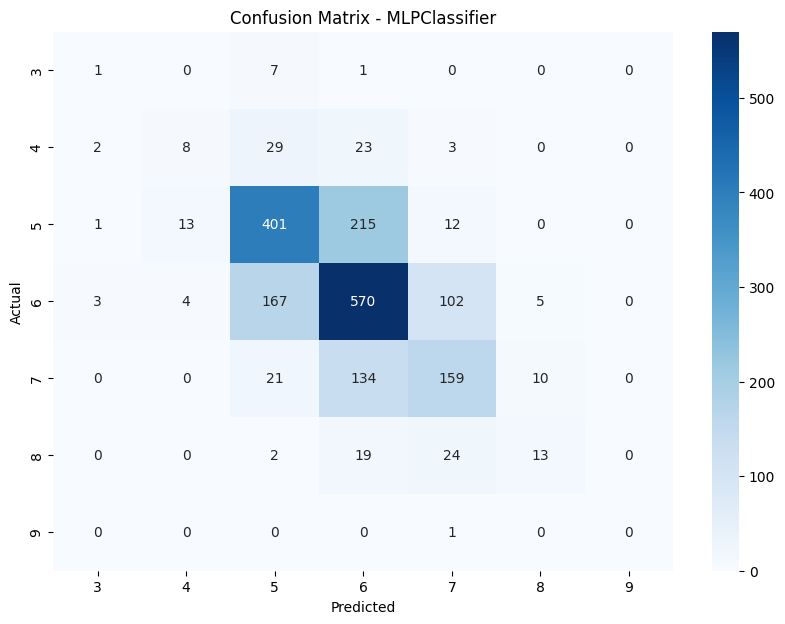


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.14      0.11      0.12         9
           4       0.32      0.12      0.18        65
           5       0.64      0.62      0.63       642
           6       0.59      0.67      0.63       851
           7       0.53      0.49      0.51       324
           8       0.46      0.22      0.30        58
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1950
   macro avg       0.38      0.32      0.34      1950
weighted avg       0.58      0.59      0.58      1950

✅ Resultados MLPClassifier: {'Accuracy': 0.5907692307692308, 'Precision': 0.5820450554059442, 'Recall': 0.5907692307692308, 'F1-Score': 0.5825172475956352}


In [15]:
# Red Neuronal (MLPClassifier)
model_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
model_mlp.fit(X_train_imputed, y_train)
results_mlp = evaluate_model(model_mlp, X_test_imputed, y_test, labels=labels)
print("✅ Resultados MLPClassifier:", results_mlp)

## 6️⃣ Comparación de Modelos Avanzados - Métricas Clave

In [18]:
# Crear DataFrame con los resultados obtenidos
model_results_all = pd.DataFrame({
    "Modelo": ["LinearSVC", "Decision Tree", "Random Forest", "XGBoost", "LightGBM", "MLPClassifier"],
    "Accuracy": [results_svm["Accuracy"], results_dt["Accuracy"], results_rf["Accuracy"], 
                 results_xgb["Accuracy"], results_lgbm["Accuracy"], results_mlp["Accuracy"]],
    "F1-Score": [results_svm["F1-Score"], results_dt["F1-Score"], results_rf["F1-Score"], 
                 results_xgb["F1-Score"], results_lgbm["F1-Score"], results_mlp["F1-Score"]],
    "Precision": [results_svm["Precision"], results_dt["Precision"], results_rf["Precision"], 
                  results_xgb["Precision"], results_lgbm["Precision"], results_mlp["Precision"]],
    "Recall": [results_svm["Recall"], results_dt["Recall"], results_rf["Recall"], 
               results_xgb["Recall"], results_lgbm["Recall"], results_mlp["Recall"]]
})

# Ordenar por mejor Accuracy
model_results_all = model_results_all.sort_values(by="Accuracy", ascending=False)
print("📊 Resultados finales:")
print(model_results_all)

📊 Resultados finales:
          Modelo  Accuracy  F1-Score  Precision    Recall
2  Random Forest  0.677436  0.666465   0.682860  0.677436
4       LightGBM  0.663590  0.656669   0.662941  0.663590
3        XGBoost  0.656923  0.648593   0.658287  0.656923
5  MLPClassifier  0.590769  0.582517   0.582045  0.590769
1  Decision Tree  0.588205  0.589475   0.591936  0.588205
0      LinearSVC  0.510256  0.450903   0.483225  0.510256


## 7️⃣ Optimización de Random Forest con GridSearchCV

Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


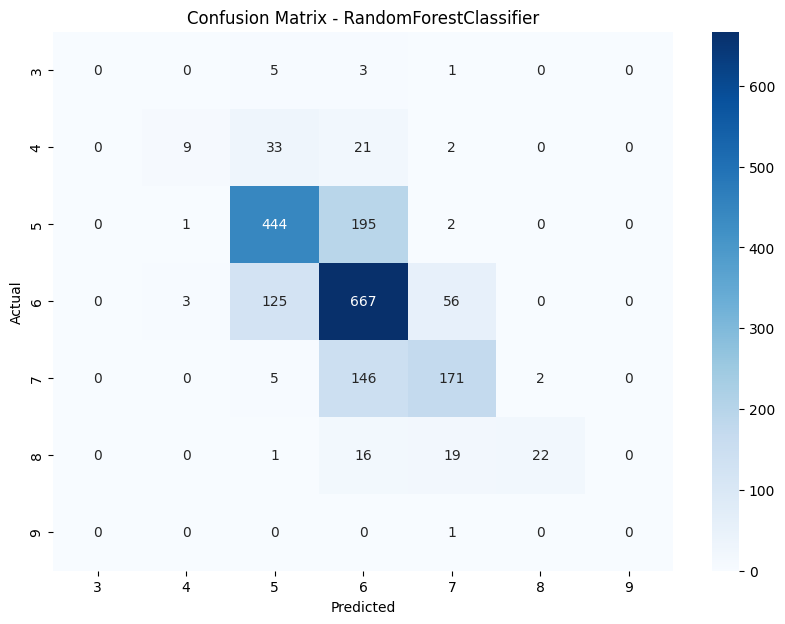


🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.69      0.14      0.23        65
           5       0.72      0.69      0.71       642
           6       0.64      0.78      0.70       851
           7       0.68      0.53      0.59       324
           8       0.92      0.38      0.54        58
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1950
   macro avg       0.52      0.36      0.40      1950
weighted avg       0.68      0.67      0.66      1950

✅ Resultados del Mejor Random Forest: {'Accuracy': 0.6733333333333333, 'Precision': 0.6793066555369646, 'Recall': 0.6733333333333333, 'F1-Score': 0.6618271415243194}


In [21]:

# Definir los hiperparámetros a buscar
param_grid = {
    "n_estimators": [100, 200, 500],  # Número de árboles
    "max_depth": [10, 20, None],  # Profundidad máxima
    "min_samples_split": [2, 5, 10],  # Min muestras para dividir
    "min_samples_leaf": [1, 2, 4]  # Min muestras en cada hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)

# Entrenar el modelo optimizado
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"✅ Mejores hiperparámetros: {best_params}")

# Evaluar el modelo optimizado
best_rf = grid_search.best_estimator_
results_best_rf = evaluate_model(best_rf, X_test, y_test, labels=labels)
print("✅ Resultados del Mejor Random Forest:", results_best_rf)